# Music Recommendation

Project mentor:Sophia Sklaviadis <br>
Team Members: yhu101@jhu.edu, ychen502@jhu.edu, hli181@jhu.edu, xmao8@jhu.edu <br>
https://github.com/yawenh/Million-Song-Music-AI

# Outline and Deliverables


<font size="3">Completed Deliverables:</font>
1. "Must accomplish #1":During the recall stage, we use the user-based Collaborative Filtering to gain the top 50 similar songs. This part is on the IV. Recommendation - method part, User-based Collaborative Filtering <br>

2. "Must accomplish #2":In the sorting stage, do Content-Based Filtering on the output of the recall stage to obtain a rating ranking. This part is on IV. Recommendation - Method(Sorting) - 3.content-based similarity sorting <br>

3. "Expect to accomplish #2":In the sorting stage, look for other evaluation indicators that can be used as a good or bad ranking result, and use this indicator to obtain new recommendation results. <br>
(On the IV. Recommendation - method part(Sorting), we consider the song features as indicators to sort the recommendation songs get on the recall stage). <br>

4. "Expect to accomplish #3":In the ranking stage, use deep learning algorithms (eg, RNN) to predict the model to improve the ranking results of the music output in the recall stage.<br>(On the IV. Recommendation - method part, we implement logistic regression, RNN, LSTM, and Dense classifier to sort the recommendation songs we get on the recall stage, give better commendation songs).

<font size="3">Uncompleted Deliverables:</font>

1. "Must accomplish #3":In both stages, hyperparameter automatic search algorithms (such as GridSearchCV) is used to select the optimal parameters for algorithm tuning, and the results under different optimizers (such as FTRL, SGD, etc.) are compared to obtain the best model. <br>
(We used the loss function and our evaluation method describe on the recommendation part below to evaluate a good hyperparameter)

2. "Expect to accomplish #1":Add feature pre-processing, use the Word2vec embedding layer in the pre-training stage to reduce the dimension and densify the sparse features, and optimize the recommendation results.<br>
(Without the feedback of users to our recommendation list of songs, this method does not improve the recommendation list accuracy). 

<font size="3">Additional Deliverables:</font>
1. We decided to add logistic regression model, LSTM, Dense Classifier to predict whether a user would like the recommendation songs, and sotring the recommendation list get from the user-based recommendation to improve our commendation songs. <br>

2. We wrote a evaluation method to measure our recommendation songs performance. The code is on evaluation.py file, describe the logistic(method) on the IV. Recommendation - Method(sorting) - evaluate part.

# Preliminaries

## What problem were you trying to solve or understand? <br>
* We research how to recommend suitable songs that are more likely to match users perference. We combine the users'style similarity and the features of song to get better recommendation.<br>

## What are the real-world implications of this data and task?
* This logic is feasible for all kinds of recommendation tasks. All recommendation task based on measuring the users' similarity and contents similarity to recommend. We can provide users with more songs that meet their preferences and make them more satisfied with this music software. It also allows them to discover more music similar to their favorite music, bringing them listening enjoyment. <br>

## How is this problem similar to others we’ve seen in lectures, breakouts, and homeworks?

* We divide our project into two stage. On the first stage, recall stage. We used KNN cluster algorithm, which is one of the clustering algorithm we learned in this class, we also implemented cluster algorithm on homework 4, to cluster users with similar taste of songs.<br>
* And on the second stage, sotring stage, we considering the songs feature to classify the recommendation songs to two classes, like or dislike. This is classification question, we learned it in class. And we did a question in homework 1 that talk about what method can rank items? On this project, we implement classification algorithms, gain the probability of each class, higher probability rank higher. 

## What makes this problem unique?
* This is a music recommendation project. But, we are not simply recommending music with similar styles based on the style of the previous song that the user listened to. We combine song features and user preferences. For example, the listening histories of two users are highly overlapped, so the songs that one user has listened to are recommended to another similar user who has not listened to these songs. This recommendation method has nothing to do with the songs themselves but has a large likelihood that the recommended user will like. And then we considering the songs feature to sort the recommendation list, it's very unique, to predict the probability that the user will like the song. <br>
* And we wrote an evaluation method to measure our model performance based on what we learned in another lesson on information retrieval.

## What ethical implications does this problem have?
* Analyze users with similar tastes in songs. If this information is leaked, scammers will easier to approach the user by discussing music, drawing closer to the user, creates a risk of fraud.


# Dataset

## Describe the datasets you used?
* The user data is from the Taste Profile Subset released by The Echo Nest as part of the Million Song Dataset. The data comes in a (user,song, play count) triplets format and is used to build our collaborative filtering system. 
* The music data comes from the Million Song Dataset, which contains a million samples with a total size of 273GB. 

## How were they collected?
* data source link: http://millionsongdataset.com/

## Why did you choose them?
* We choose this dataset because it has both user data and audio feature data and metadata of the songs, which is great for us to build the hybrid recommendation system relies on both song and user information.

## How many samples in each:
* The raw user data has around one million samples with a total size of 500MB.
* For the song data, to ease our exploration,we used a subset of 10,000 songs (1.8GB compressed) with 9 most representative features.

In [2]:
import pandas as pd
data=pd.read_csv('user_subset.csv')
song = pd.read_csv('meta_data_subset.csv')
# User data:
data.head(2)

,Unnamed: 0,Usr,Song,Time
0,630,5a905f000fc1ff3df7ca807d57edb608863db05d,SOEBCBI12AF72A154F,5
1,658,5a905f000fc1ff3df7ca807d57edb608863db05d,SOFKTPP12A8C1385CA,1


In [3]:
# Song data:
song.head(2)

,Unnamed: 0,song_id,title,song_hotness,duration,key,loudness,mode,tempo,artist,artist_hotness
0,0,SOGSMXL12A81C23D88,Je Sais Que La Terre Est Plate,0.547953,148.74077,0,-9.636,1,124.059,Raphaël,0.386152
1,1,SOMBCOW12AAF3B229F,On Efface,0.475638,252.99546,1,-11.061,0,80.084,Julie Zenatti,0.434860


# Pre-processing

## What features did you use or choose not to use? Why?
* The features we used are: song_hotness, duration,	key, loudness, mode, tempo, artist, artist_hotness. Those features covers metadata, audio features, and artist attributes of the songs.

## How did you deal with missing data? What about outliers?
* For missing values, we removed the column called song hotness, which is the only column contains missing values, because we do not want to furthur reduce our users size. 

* We furthur merged the user data and song data to get a combined dataset. As we are using the play counts of a song as an implicit feedback from the user, we removed the users who has a playlist with less than 5 songs. The final used data has 151057 rows × 12 columns. The data cleaning steps can be found on github in the file called `data_cleaning.py`.

## What approaches did you use to pre-process your data? Why?
* The raw song data is in h5 format, we get the the id, title and the 8 corresponding attributes using the `hdf5_getters` API.
* In the sorting stage, where we used the song dataset, we normalized those features, as different featuers have different units, we want to keep the scales uniform.

## Are your features continuous or categorical? 
- categorical features: key, mode.
- continuous features: duration, loudness, tempo, artist_hotness, song_hotness.


In [15]:
# import pandas as pd
import numpy as np
from numpy.linalg import norm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from surprise import KNNBasic
from surprise import SVD
from surprise import Reader, Dataset, accuracy
from surprise.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import statistics
from evaluation import *
import warnings
warnings.filterwarnings('ignore')

# I. Read in data:

In [76]:
data, song = data.iloc[:,1:], song.iloc[:,1:]
song = song.rename(columns = {'song_id':'Song'})
data = pd.merge(data, song, how = 'inner', on = 'Song')
data.head()

,Usr,Song,Time,title,song_hotness,duration,key,loudness,mode,tempo,artist,artist_hotness
0,5a905f000fc1ff3df7ca807d57edb608863db05d,SOEBCBI12AF72A154F,5,The Captain,NaN,368.79628,4,-11.194,0,105.02,The Knife,0.487848
1,761601781ea89218ebe21c4ccaa996e7a6479671,SOEBCBI12AF72A154F,1,The Captain,NaN,368.79628,4,-11.194,0,105.02,The Knife,0.487848
2,55fc5990fc7911cfbba36c6ae26bfa3f532d8627,SOEBCBI12AF72A154F,1,The Captain,NaN,368.79628,4,-11.194,0,105.02,The Knife,0.487848
3,ea11e93ba014e8ff4cf302ac548d9246f2b76918,SOEBCBI12AF72A154F,3,The Captain,NaN,368.79628,4,-11.194,0,105.02,The Knife,0.487848
4,e3b48b679fc7215d3c7b29c6b944b34c6019a29a,SOEBCBI12AF72A154F,1,The Captain,NaN,368.79628,4,-11.194,0,105.02,The Knife,0.487848


In [77]:
# labeling and encoding:
user_encoder = LabelEncoder()
data['Usr'] = user_encoder.fit_transform(data['Usr'].values)

song_encoder = LabelEncoder()
data['Song'] = song_encoder.fit_transform(data['Song'].values)
data.astype({'Usr': 'int32', 'Song': 'int32', 'Time': 'int32'})

,Usr,Song,Time,title,song_hotness,duration,key,loudness,mode,tempo,artist,artist_hotness
0,8021,519,5,The Captain,NaN,368.79628,4,-11.194,0,105.020,The Knife,0.487848
1,10432,519,1,The Captain,NaN,368.79628,4,-11.194,0,105.020,The Knife,0.487848
2,7609,519,1,The Captain,NaN,368.79628,4,-11.194,0,105.020,The Knife,0.487848
3,20892,519,3,The Captain,NaN,368.79628,4,-11.194,0,105.020,The Knife,0.487848
4,20336,519,1,The Captain,NaN,368.79628,4,-11.194,0,105.020,The Knife,0.487848
...,...,...,...,...,...,...,...,...,...,...,...,...
151052,15128,1922,2,Intensity In Ten Cities,0.547953,247.48363,7,-3.402,1,231.851,Embrace the End,0.420177
151053,11818,1615,3,Cabiria,0.473347,203.96363,0,-10.881,1,132.073,Hot Club Of Cowtown,0.389848
151054,9494,1543,1,Safe Passage,0.265861,330.97098,7,-16.934,1,101.529,Michael Gettel,0.333771
151055,9494,2823,1,River Run,0.262309,452.25751,1,-16.685,0,168.035,Michael Gettel,0.333771



# II. Train test split:

In [78]:
user_id = data['Usr'].unique()
train_uid,test_uid = user_id[:22700],user_id[22700:]
train = data[data['Usr'].isin(train_uid)]
song_id = train['Song'].unique()

# Test user only keep songs have overlap with train user song lists, and delete user with personal songlist < 4:
test = data[data['Usr'].isin(test_uid) & data['Song'].isin(song_id)]
temp = test.groupby('Usr').count()['Song'].reset_index()
uid = temp[temp['Song'] >= 4]['Usr']
del temp
test = test[test['Usr'].isin(uid)]

In [79]:
# For each test user, keep 2 songs as known; And other songs in the song list as hidden songs.
# The hidden songs will be used to test the performance of the recommendation system later.

# X: For user based recommendation
# user_hidden_songs: test user and hidden song list.
user_song = {}
for user, group in test.groupby('Usr'):
    user_song[user] = group['Song'].values.tolist()    
test1 = []
for user in user_song:
    for i in range(2):
        test1.append(test[(test['Usr']==user)&(test['Song']==user_song[user][i])].squeeze())
test1 = pd.DataFrame(test1)
X = pd.concat([train,test1])
del test1
del train

test_hidden = []
for user in user_song:
    for i in range(2,len(user_song[user])):
        test_hidden.append(test[(test['Usr']==user)&(test['Song']==user_song[user][i])].squeeze())
test_hidden = pd.DataFrame(test_hidden)[['Usr','Song']]

user_hidden_songs = {}
for user, group in test_hidden.groupby('Usr'):
    user_hidden_songs[user] = group['Song'].values.tolist()
del test_hidden

# III. EDA

In [80]:
# Distribution of playcounts per user (user_playcounts)
user_playcounts = {}
for user, group in X.groupby('Usr'):
    user_playcounts[user] = group['Time'].sum()

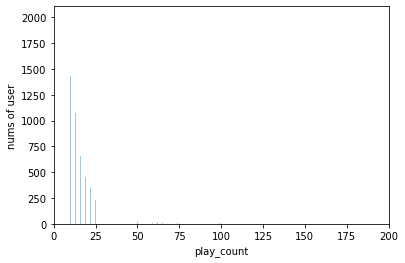

In [81]:
sns.distplot(list(user_playcounts.values()), bins=5000, kde=False)
plt.xlim(0, 200)
plt.xlabel('play_count')
plt.ylabel('nums of user')
plt.show()

In [82]:
# Distribution of playcounts per song (song_playcounts)
song_playcounts = {}
for song, group in X.groupby('Song'):
    song_playcounts[song] = group['Time'].sum() 

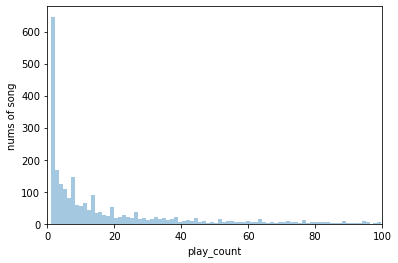

In [83]:
sns.distplot(list(song_playcounts.values()), bins=10000, kde=False)
plt.xlim(0, 100)
plt.xlabel('play_count')
plt.ylabel('nums of song')
plt.show()

In [84]:
user_averageScore = {}
for Usr, group in X.groupby('Usr'):
    user_averageScore[Usr] = group['Time'].mean()

In [85]:
X['rating'] = X.apply(lambda x: np.log(2 + x.Time / user_averageScore[x.Usr]), axis=1)

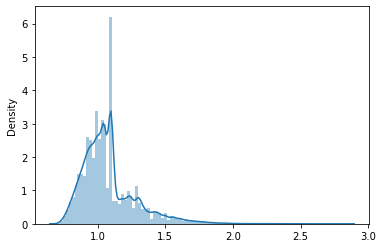

In [86]:
sns.distplot(X['rating'].values, bins=100)
plt.show()

In [87]:
user_item_rating = X[['Usr', 'Song', 'rating']]
user_item_rating = user_item_rating.rename(columns={'Song': 'item'})

In [88]:
# User and their corresponding song list
user_songs = {}
for user, group in user_item_rating.groupby('Usr'):
    user_songs[user] = group['item'].values.tolist()

# unique songs
songs = user_item_rating['item'].unique().tolist()

# IV. Recommendation

# Methods( Recall Stage )
## User-based Collaborative Filtering(UB-CF)

### What methods did you choose? 

* We chose User-based Collaborative Filtering(UB-CF) method in the first step to select candidate song sets. 
* Then we sorted candidate song sets based on song features by using different sorting methods, including Content-based sorting、Logistic Regression、RNN、LSTM and Dense Classifier models.


### Why did you choose it?

* Imagine that we want to recommend a song to our friend Lily. We could assume that similar people will have similar taste. Suppose that Jack and Lily have listened to the same songs, and they rated them almost identically. If Lily hasn’t listened ‘Love story’song, but Jack did. If Jack loves that song, it sounds logical to think that Lily will too. 
* Thus, User-based Collaborative Filtering uses that logic and recommends songs by finding similar users to the active user (to whom we are trying to recommend songs) in our first step.


### How did you train this method? 

1.	Find the K-nearest neighbors (KNN) (K=40) to the user A, using a similarity function w (pearson) to measure the distance between each pair of users.
2.	Predict the rating that user A will give to all songs the k neighbors have consumed but A has not. The ratings given to a particular song are obtained by using a weighted average approach. In practice, we multiplied the rating of songs rated by each neighbor users with similarity function w calculated in the first step.

**To predict the songs that the active user might like should base on the ratings of items. Since we had no direct rating feature, we defined ratings as follows: Rating = log(2 + Current song play counts/average of songs play counts)**



### For each method, what hyperparameters did you evaluate? How sensitive was your model's performance to different hyperparameter settings?

For our recall stage, the main hyper-parameter is K, the number of neighbors. We choose K by fixing the sorting stage, only change the value K on training datasets. We split the training datasets into training and evaluation sets with ratio 8:2. Then we calculate the accuracy and precision for different K. When K equals 40, it gives the best result, therefore, we fix K to be 40.





In [89]:
# User based Collaborative Filtering:
reader = Reader(line_format='user item rating', sep=',')
raw_data = Dataset.load_from_df(user_item_rating, reader=reader)
kf = KFold(n_splits=2)
knn_usercf = KNNBasic(k=40, sim_options={'user_based': True})
for trainset, testset in kf.split(raw_data):
    knn_usercf.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [90]:
X.head()

,Usr,Song,Time,title,song_hotness,duration,key,loudness,mode,tempo,artist,artist_hotness,rating
0,8021,519,5,The Captain,NaN,368.79628,4,-11.194,0,105.02,The Knife,0.487848,1.452252
1,10432,519,1,The Captain,NaN,368.79628,4,-11.194,0,105.02,The Knife,0.487848,0.897942
2,7609,519,1,The Captain,NaN,368.79628,4,-11.194,0,105.02,The Knife,0.487848,1.098612
3,20892,519,3,The Captain,NaN,368.79628,4,-11.194,0,105.02,The Knife,0.487848,1.038508
4,20336,519,1,The Captain,NaN,368.79628,4,-11.194,0,105.02,The Knife,0.487848,0.969401


In [91]:
logistic_data = X.copy()
KNN_data = X.copy()

# Methods( Sorting Stage )
## Song similarity, Logistic Regression, RNN, LSTM, Dense Classifier models

### Why did you choose them?

* In the sorting step, we need to choose the top favorite songs for each users based on the candidate song sets obtained from UB-CF. Below, we applied totally five different sorting methods here. 

* As we only used user data in the recall stage, we here also want to introduce the features related to songs, such as tempo, mode, key, duration, etc, into our systems. The most simple one is calculating the similarities between songs and sort by that. 

* Since we had already obtained the ratings for each songs in candidate song set, we introduce the song features to predict whether the person like to listen the song or not now. We regard these ratings as  response variable in our models by setting an appropriate threshold(0.7), higher than threshold as class 1, lower as 1, song features as predictors. We used these classification methods to predict the probability that user like the song. Sorting the candidate songs by predictive probability.
In such case, we chose fully connected neural network considering the large amount of data. And NN model is flexibe since we can set different activation function, layers, loss function to find a better result.  
* Besides,since the more higher rating,the more likely the user will listen to this song, which means that higher rating songs represents a more similar taste to the user. If we can capture the information in these higher rating songs, we can recommend more accurate songs to users.  
In such cases, we consider choosing RNN and LSTM models since they can better handle sequence information.


### How did you train these methods? 
1. Song Similarity:
* For each song in the recommendation list, we calculated the average consine similartiy between it and all the songs in users original playlist based on the song metadata features and audio features. We then use the average similarity value to sort the song list.

2. Logistic regression:
* Depending on the ratings of user to songs, treat the rating as y, songs feature as predictors to predict the probabiloity that the user will like the song. The median rating is 1.04145, higher than this as class 1, else 0. <br>
* Rank the recommendation songs provided by user similarity depends on the predictive probabilities.

3. Dense Classifier with two hidden layers:  
* First hidden layers: 128 neurons; Relu activation function  
* Second hidden layers: 64 neurons; Relu activation function  
* Output: Sigmoid activation function  
* Optimizer: Adam; Loss function: binary crossentropy  
4. RNN with two hidden layers:  
* First hidden layers: 100 neurons; Relu activation function  
* Second hidden layers: 100 neurons; Relu activation function  
* Optimizer: Adam; Loss function: MSE; Dropout rate: 0.1  
5. LSTM with two hidden layers: 
* First hidden layers: 10 neurons; Relu activation function  
* Second hidden layers: 10 neurons; Relu activation function  
* Optimizer: Adam; Loss function: binary crossentropy; Dropout rate: 0.1


### How did you evaluate them? Why?

We held out 140 test users for peformance evaluation. For each of those 140 test users, we only kept 2 songs from their song playlist as our known song list. Other parts of their playlist are hidden to us and only used for measuring the performance of our different sorting algorithms. And we used three metrics to evaluate our ranked recommendation song list, which are accurarcy score, mean precision, and normalized precision.

1. Accuracy score: 
    * accuracy = # of recommended songs in users hidden song list / # of recommended songs
    * To calculate the accuracy, we provided a 50 songs recommendation playlist for each test user based on different sorting criteria. And we then calculate average accuracy over all the test users.
    * As the accuracy score of 50-song recommendation list is pretty low among all the sorting algorithms, and it also cannot take order of the list into account, it is quite hard to compare performance based on it. So we introduced another two metrics for evaluation.

2. Mean precision & Normalized precision:
    * mean precision $= \frac{Prec_{0.25} + Prec_{0.5} + Prec_{0.75}}{3}$, where $Prec_{0.25}$ means precision when recall equals 0.25, and similar for $Prec_{0.5}$ and $Prec_{0.75}$.
    * normalized precision $= 1 - \frac{\sum_{i=1}^{hid}logRank_i - \sum_{i=1}^{hid}logi}{logN!/(N-hid)!(hid)!}$, where $hid$ denotes the total number of songs in user's hidden song list; $Rank_i$ is the position of the ith song in the hidden song list in the ranked returned recommendation list; N is the total number of returned recommendation song list.
    * For each user, we returned a full ranked list of all the songs they haven't listened to. And we can measure the ranking of the songs in their hidden song list. Generally, if the songs in their hidden song list appears in front positions of the ranked list, we can get a higher precsion score. And this also indicates the sorting algorithms have better peformance.

Based on the evaluation result, we choose the best performance sorting algorithm and used it to provide each user the top 5 songs as our final recommendation.  


### Which methods were easy/difficult to implement and train? Why?  
Relative speaking, Dense Classifer model is easier to implement while RNN and LSTM models are relatively harder since Dense classifer is a simple fully connected classification netowork, however, for RNN and LSTM, the very obvious problem for these two models are they have more hyper-parameters and they are easily overfitted. RNN and LSTM are normally used to predict text messages, whose datasets normally has much more features than we do in this project (we only have ten features for each tuple). 


### For each method, what hyperparameters did you evaluate? How sensitive was your model's performance to different hyperparameter settings?  
We evaluate the loss function, threshold (0.7 in our model to classify samples into 1 and 0 by rating feature), activation functions, model depth, batch size, drop rate and epoch for each model. RNN and Dense network are much more stable than LSTM. LSTM model in our project is more sensitive to our hyperparameters. LSTM is especially sensitive to network depth. All the three models are sensitive to loss functions. Models are relatively stable to other hyper-parameters.

1. Baseline

In [92]:
#total_listen number:
data_grouped = data.groupby(['Song']).agg({'Usr': 'count'}).reset_index() 
data_grouped.rename(columns = {'Usr': 'listenership'},inplace=True)  
data_grouped = data_grouped.sort_values(['listenership', 'Song'], ascending = [0,1]) 
data_grouped['Rank'] = data_grouped['listenership'].rank(ascending=0, method='first')
recommendation_list = list(data_grouped['Song'])

def baseline_model(userID, N=5):
# playlist of user
    used_items = user_songs[userID]

    recom_list = []
    count = 0
    for i in range(len(recommendation_list)):
        if recommendation_list[i] not in used_items:
            recom_list.append(recommendation_list[i])
            count +=1
            if count ==N:
                return recom_list  
        else:
            continue

2. User based recall

In [93]:
from sklearn.preprocessing import StandardScaler
attr = X.drop(['Usr', 'title', 'Time', 'song_hotness', 'artist'], axis=1).drop_duplicates().set_index('Song')
scaler = StandardScaler()
attr_std = scaler.fit_transform(attr)
attr_df = pd.DataFrame(attr_std, index=attr.index, columns=attr.columns)

# (song_id, title)
song_title = dict(zip(data['Song'], data['title']))
# (song_id, normalized metadata attributes)
song_attr = dict(zip(attr_df.index, attr_df.values.tolist()))

3. Content based similarity sorting:

In [94]:
# Content based similarity sorting:
def content_based_sorting(rec_items, used_items):
    
    # Calc cosine similarity:
    def cosine_sim(x, y):
        x,y = np.array(x), np.array(y)
        return np.dot(x, y)/(norm(x)*norm(y))
    
    # (song, total similarity between current song and all songs in user historic song list):
    sim = {}
    for sid in rec_items:
        sim[sid] = sum([cosine_sim(song_attr[sid], song_attr[ssid]) for ssid in used_items])
    song_ids = dict(sorted(sim.items(), key=lambda x: x[1], reverse=True))
    return list(song_ids.keys())

4. Logistic Regression

In [95]:
rank_logistic_data = logistic_data.drop(['title', 'Time', 'song_hotness', 'artist'], axis=1).drop_duplicates()
rank_logistic_data['rating'] = rank_logistic_data['rating'].apply(lambda x: 0 if x <= 1.04145 else 1)
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(rank_logistic_data.iloc[:, 2:-1].values, rank_logistic_data.iloc[:, -1].values, test_size=0.2)
lr_model = LogisticRegression()
lr_model.fit(X_lr_train, y_lr_train)
def logistic_sorting(recall, userID, N=2906, mode = 'logistic'):
    feature = rank_logistic_data[rank_logistic_data['Song'].isin(list(recall.keys()))]
    feature['Usr'] = userID
    feature.drop("rating", axis = 1, inplace = True)
    feature.drop_duplicates(inplace = True)
    feature.sort_values(by="Song" , ascending=True, inplace = True)
    feature = feature.iloc[:,2:]
    recall_list = list(recall.keys())
    recall_list.sort()
    weights = lr_model.predict_proba(feature)[:,1]
    score = {}
    i = 0
    for song in recall_list:
        score[song] = recall[song] * weights[i]
        i += 1
    
    # filtering the top 5 songs
    song_ids = dict(sorted(score.items(), key=lambda x: x[1], reverse=True)[: N])
    
    return list(song_ids.keys())

In [97]:
import matplotlib.pyplot as plt
from math import sqrt
from matplotlib import pyplot
import pandas as pd
import numpy as np
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import layers
import tensorflow as tf

In [111]:
rank_data = KNN_data.drop(['title', 'Time', 'song_hotness', 'artist'], axis=1).drop_duplicates()
rank_data['rating'] = rank_data['rating'].apply(lambda x: 0 if x < 0.7 else 1)
rank_data.head()

,Usr,Song,duration,key,loudness,mode,tempo,artist_hotness,rating
0,8021,519,368.79628,4,-11.194,0,105.02,0.487848,1
1,10432,519,368.79628,4,-11.194,0,105.02,0.487848,1
2,7609,519,368.79628,4,-11.194,0,105.02,0.487848,1
3,20892,519,368.79628,4,-11.194,0,105.02,0.487848,1
4,20336,519,368.79628,4,-11.194,0,105.02,0.487848,1


In [112]:
X_NN_train, X_NN_test, y_NN_train, y_NN_test = train_test_split(rank_data.iloc[:, :-1].values, rank_data.iloc[:, -1].values, test_size=0.2)
X_NN_train = np.reshape(X_NN_train, (X_NN_train.shape[0],X_NN_train.shape[1] , 1))
X_NN_test = np.reshape(X_NN_test, (X_NN_test.shape[0], X_NN_test.shape[1], 1))
X_NN_train, y_train = np.array(X_NN_train), np.array(y_NN_train)
X_NN_test, y_NN_test = np.array(X_NN_test), np.array(y_NN_test)

5. RNN

In [113]:
RNN_model = Sequential()
RNN_model.add(layers.SimpleRNN(units=100, return_sequences=True))
RNN_model.add(Activation('relu'))
RNN_model.add(Dropout(0.1))
RNN_model.add(layers.SimpleRNN(units=100))
RNN_model.add(Activation('relu'))
RNN_model.add(Dropout(0.1))
RNN_model.add(Dense(1))
RNN_model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(), metrics =['accuracy'])
history = RNN_model.fit(X_NN_train, y_NN_train, epochs=1, batch_size=64,
validation_data=(X_NN_test, y_NN_test), verbose=2)
RNN_model.summary()

1883/1883 - 13s - loss: 0.0068 - accuracy: 0.9991 - val_loss: 9.3066e-06 - val_accuracy: 1.0000 - 13s/epoch - 7ms/step
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 8, 100)            10200     
                                                                 
 activation_6 (Activation)   (None, 8, 100)            0         
                                                                 
 dropout_6 (Dropout)         (None, 8, 100)            0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 100)               20100     
                                                                 
 activation_7 (Activation)   (None, 100)               0         
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
 

6.LSMT

In [114]:
LSTM_model = Sequential()
LSTM_model.add(layers.LSTM(units=10, activation='relu', return_sequences=True))
LSTM_model.add(layers.LSTM(units=10, activation='relu'))
LSTM_model.add(Dense(1))
LSTM_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics =['accuracy'])
history = LSTM_model.fit(X_NN_train, y_NN_train, epochs=1, batch_size=64,
validation_data=(X_NN_test, y_NN_test), verbose=2)
LSTM_model.summary()

1883/1883 - 15s - loss: 2.2661 - accuracy: 0.8455 - val_loss: 0.7173 - val_accuracy: 0.9530 - 15s/epoch - 8ms/step
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 8, 10)             480       
                                                                 
 lstm_7 (LSTM)               (None, 10)                840       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


7. Neural Network

In [115]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
import numpy as np
import tensorflow as tf
NN_model = keras.Sequential([keras.layers.Flatten(input_shape = (8, 1)),
                keras.layers.Dense(128,activation = tf.nn.relu),     
                keras.layers.Dense(64,activation = tf.nn.relu), 
                keras.layers.Dense(1),                 
                keras.layers.Dense(1,activation = tf.nn.sigmoid)])
NN_model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics =['accuracy'])
history = NN_model.fit(X_NN_train, y_NN_train, epochs=1, batch_size=64,
validation_data=(X_NN_test, y_NN_test), verbose=2)
NN_model.summary()

1883/1883 - 4s - loss: 5.8586 - accuracy: 0.9971 - val_loss: 3.3344e-19 - val_accuracy: 1.0000 - 4s/epoch - 2ms/step
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 8)                 0         
                                                                 
 dense_20 (Dense)            (None, 128)               1152      
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 1)                 65        
                                                                 
 dense_23 (Dense)            (None, 1)                 2         
                                                                 
Total params: 9,475
Trainable params: 9,475
Non-trainable params: 0


In [116]:
def Multi_NN_sorting(recall, userID, N=2906, mode = 'NN'):
    feature = rank_data[rank_data['Song'].isin(list(recall.keys()))]
    feature['Usr'] = userID
    feature.drop("rating", axis = 1, inplace = True)
    feature.drop_duplicates(inplace = True)
    feature.sort_values(by="Song" , ascending=True, inplace = True)
    recall_list = list(recall.keys())
    recall_list.sort()
    feature = feature.to_numpy().reshape(feature.shape[0], feature.shape[1], 1)
    if mode == "RNN":
        weights = RNN_model.predict(feature)
    elif mode == "LSTM":
        weights = LSTM_model.predict(feature)
    else:
        weights = NN_model.predict(feature)
    score = {}
    i = 0
    for song in recall_list:
        score[song] = recall[song] * weights[i]
        i += 1
    
    # filtering the top 5 songs id
    song_ids = dict(sorted(score.items(), key=lambda x: x[1], reverse=True)[: N])
    
    return list(song_ids.keys())

## Final recommender

In [117]:
# Return a song list based on User CF and sorting by different criteria:
def recommendation_basedonUserCF(userID, N=2906, sorting = 'item_sim'):
    used_items = user_songs[userID]
    item_ratings = {}
    for item in songs:
        if item not in used_items:
            item_ratings[item] = knn_usercf.predict(userID, item).est
    song_ids = dict(sorted(item_ratings.items(), key=lambda x: x[1], reverse=True)[:N])
    median_rate = statistics.median(item_ratings.values())
    if sorting == 'item_sim':
        return content_based_sorting(list(song_ids.keys()), used_items)
    if sorting == 'logistic':
        return logistic_sorting(song_ids, userID,N)
    if sorting == 'RNN':
        return Multi_NN_sorting(song_ids, userID, N, 'RNN')
    if sorting == 'LSTM':
        return Multi_NN_sorting(song_ids, userID, N, 'LSTM')
    if sorting == 'NN':
        return Multi_NN_sorting(song_ids, userID, N, 'NN')
    return list(song_ids.keys())
recommendation_basedonUserCF(1162,5,'RNN')

[1133, 117, 997, 2513, 508]

## Results


### Show tables comparing your methods to the baselines.
| Model | Accuracy | Mean Precision | Normalized Precision |
| :- | :-: | :-: | :-: |
| Baseline | 0.00 |  | 
| Pure User Based | 0.001 | 0.0827 | 0.191
| Content Based Sorting | 0.0827 | 0.0827 | 0.257
| Logistic Sorting | 0.0044 | 0.0996 | 0.211
| RNN Sorting | 0.0044 | 0.104 | 0.2278
| LSTM Sorting | 0.0044 | 0.073 | 0.1854
| Dense Classifier Sorting | 0.0044 | 0.106 | 0.222

*Since the baseline accuracy is 0, precision is not available

### What about these results surprised you? Why?

The result given by LSTM is worse than expected while Dense Classifier is better than expected, since LSTM is much more complicated model while Dense Classifier is just a two-layer fully connected network. The reason for this result is that LSTM turn to be overfitted since it is normally used to process much larger datasets while our datasets only have ten features for each sample, it is easy to be overfitted. 

### Did your models over- or under-fit? How can you tell? What did you do to address these issues?

LSTM and RNN is overfitted since with depth larger then 10, it can get training accuracy to be 1 in less than two epochs, in sorting step. We reduced the network depth, added the network dropout, and reduced the number of epochs. 

### What does the evaluation of your trained models tell you about your data? How do you expect these models might behave differently on different data? 
The evaluation result tells us that the our datasets is relatively small compared with other datasets (image datasets, singal datasets, and even text datasets). For our datasets, it is not suitable to apply complicated models, it is easy to be overfitted. 

# V. Performance Evaluation:

In [118]:
## I. Accuracy Score
from evaluation import *
acc = [acc_score(recommendation_basedonUserCF(k),user_hidden_songs[k]) for k in user_hidden_songs]
acc_content = [acc_score(recommendation_basedonUserCF(k,N=50, sorting = 'item_sim'),user_hidden_songs[k]) for k in user_hidden_songs]
acc_logistic = [acc_score(recommendation_basedonUserCF(k,N=50, sorting = 'logistic'),user_hidden_songs[k]) for k in user_hidden_songs]
acc_RNN = [acc_score(recommendation_basedonUserCF(k, N=50, sorting ='RNN'),user_hidden_songs[k]) for k in user_hidden_songs]
acc_LSTM = [acc_score(recommendation_basedonUserCF(k,N=50, sorting = 'LSTM'),user_hidden_songs[k]) for k in user_hidden_songs]
acc_NN = [acc_score(recommendation_basedonUserCF(k, N=50, sorting = 'NN'),user_hidden_songs[k]) for k in user_hidden_songs]

print('The average accuracy of 50 recommended song list by user-based:', np.mean(acc))
print('The average accuracy of 50 recommended song list by content-based:', np.mean(acc_content))
print('The average accuracy of 50 recommended song list by logistic sotring:', np.mean(acc_logistic))
print('The average accuracy of 50 recommended song list by RNN sotring:', np.mean(acc_RNN))
print('The average accuracy of 50 recommended song list by LSTM sotring:', np.mean(acc_LSTM))
print('The average accuracy of 50 recommended song list by NN sotring:', np.mean(acc_NN))

The average accuracy of 50 recommended song list by user-based: 0.0011236769609975351
The average accuracy of 50 recommended song list by content-based: 0.004360902255639097
The average accuracy of 50 recommended song list by logistic sotring: 0.004360902255639097
The average accuracy of 50 recommended song list by RNN sotring: 0.004360902255639097
The average accuracy of 50 recommended song list by LSTM sotring: 0.004360902255639097
The average accuracy of 50 recommended song list by NN sotring: 0.004360902255639097


In [121]:
## II. mean precision:
mean_pre_1 = [mean_precision(recommendation_basedonUserCF(k),user_hidden_songs[k]) for k in user_hidden_songs]
mean_pre_2 = [mean_precision(recommendation_basedonUserCF(k,sorting='item_sim'),user_hidden_songs[k]) for k in user_hidden_songs]
mean_pre_RNN = [mean_precision(recommendation_basedonUserCF(k,sorting='RNN'),user_hidden_songs[k]) for k in user_hidden_songs]
mean_pre_LSTM = [mean_precision(recommendation_basedonUserCF(k,sorting='LSTM'),user_hidden_songs[k]) for k in user_hidden_songs]
mean_pre_NN = [mean_precision(recommendation_basedonUserCF(k,sorting='NN'),user_hidden_songs[k]) for k in user_hidden_songs]

print('The average mean precision based on raw user rating sorting:', np.mean(mean_pre_1))
print('The average mean precision based on item similarity sorting:', np.mean(mean_pre_2))
print('The average mean precision based on RNN sorting:', np.mean(mean_pre_RNN))
print('The average mean precision based on LSTM sorting:', np.mean(mean_pre_LSTM))
print('The average mean precision based on NN sorting:', np.mean(mean_pre_NN))

The average mean precision based on raw user rating sorting: 0.08270241218384498
The average mean precision based on item similarity sorting: 0.08270241218384498
The average mean precision based on RNN sorting: 0.10400747998839018
The average mean precision based on LSTM sorting: 0.07296833856867846
The average mean precision based on NN sorting: 0.10640457630761438


In [120]:
mean_pre_logistic = [mean_precision(recommendation_basedonUserCF(k,sorting='logistic'),user_hidden_songs[k]) for k in user_hidden_songs]
print('The average mean precision based on logistic sorting:', np.mean(mean_pre_logistic))

The average mean precision based on logistic sorting: 0.09964876993716079


In [122]:
norm_pre_1 = [norm_precision(recommendation_basedonUserCF(k),user_hidden_songs[k]) for k in user_hidden_songs]
norm_pre_2 = [norm_precision(recommendation_basedonUserCF(k,sorting='Default'),user_hidden_songs[k]) for k in user_hidden_songs]
norm_pre_logistic = [norm_precision(recommendation_basedonUserCF(k,sorting='logistic'),user_hidden_songs[k]) for k in user_hidden_songs]
norm_pre_RNN = [norm_precision(recommendation_basedonUserCF(k,sorting='RNN'),user_hidden_songs[k]) for k in user_hidden_songs]
norm_pre_LSTM = [norm_precision(recommendation_basedonUserCF(k,sorting='LSTM'),user_hidden_songs[k]) for k in user_hidden_songs]
norm_pre_NN = [norm_precision(recommendation_basedonUserCF(k,sorting='NN'),user_hidden_songs[k]) for k in user_hidden_songs]

print('The average normalized precision based on item similarity sorting:', np.mean(norm_pre_1))
print('The average normalized precision based on raw user rating sorting:', np.mean(norm_pre_2))
print('The average normalized precision based on logistic sorting:', np.mean(norm_pre_logistic))
print('The average normalized precision based on RNN sorting:', np.mean(norm_pre_RNN))
print('The average normalized precision based on LSTM sorting:', np.mean(norm_pre_LSTM))
print('The average normalized precision based on NN sorting:', np.mean(norm_pre_NN))

The average normalized precision based on item similarity sorting: 0.2579409553628042
The average normalized precision based on raw user rating sorting: 0.19565004044123482
The average normalized precision based on logistic sorting: 0.21107519487474635
The average normalized precision based on RNN sorting: 0.22780313346641026
The average normalized precision based on LSTM sorting: 0.18539820329522444
The average normalized precision based on NN sorting: 0.22171592219136071


# Discussion

## What you've learned

*Note: you don't have to answer all of these, and you can answer other questions if you'd like. We just want you to demonstrate what you've learned from the project.*

### What concepts from lecture/breakout were most relevant to your project? 

1. Some Supervised Learning models  
* KNN algorithm. The User-based Collaborative filtering method used a user-based KNN algorithm when finding the most similar users.
* Logistic Regression: sorting stage model.
2. Some Neural Networks
* RNN: sorting stage model.
* NN: sorting stage model.  
* LSTM: sorting stage model.
3. Loss function and Activation function (in Neural Networks settings)
* Loss function: Binary Crossentropy and MSE. 
* Activation function: Relu and sigmoid function. 


### What aspects of your project did you find most surprising?  

1. How to measure our recommendation results is more difficult than we expect. We cannot find a proper evaluation method to measure our candidate song sets in the recall stage using UB-CF model, even though the behind logic is reasonable.
2. Although we find a evaluation method to measure our final recommendation results, the accuracy is pretty low due to too large song library.



### What lessons did you take from this project that you want to remember for the next ML project you work on? Do you think those lessons would transfer to other datasets and/or models? Why or why not?  
We learned the following from this project:
1. For a successful project, we need to spend more time analysing different models, previous similar projects, our own datasets, rather then focus mostly on the code implementation. Later implementation will definitely benefit greatly from preliminary research.
2. Always start from a small datasets to implement workable models and then apply the models to the larger datasets. It takes so long a time for each trial of implementation with whole datasets that waste a lot of time.

We believe those lessons would transfer to other datasets and models. The above lessons are not specific for any datasets and normally machine learning algorithms are used to process large dataset, there are normally many ML models to choose from for a single problem solving, therefore, how to deal with large project and large datasets are the problems that almost all the ML projects need to face.

### If you had two more weeks to work on this project, what would you do next? Why?

1. We will try Attention mechanism. Compared with RNN, complexity of Attention is smaller and has fewer parameters. Therefore, the computing power requirement is smaller. Besides, its feature extraction ability is better than RNN model, which may result in a better result.
2. Find the relationship between features and obtain more useful features through feature intersection by using Deep FM, DCN, etc. Feature combination and construction may further improve the recommendation results.
3. Try to find additional dataset that contains the online listening record of songs in our candidate song sets. These data can help us better evaluate our recommendation results, since it directly reflects whether the user like the songs we recommend or not.
